In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [12]:
graph = {}
with open("human_interactome.csv", "r") as f:
    lines = f.read().splitlines() 
    for index in tqdm(range(len(lines))):
        line = lines[index]
        node_names = line.split(",")
        if (len(node_names) != 2):
            continue
        node1 = int(node_names[0])
        node2 = int(node_names[1])
        if (graph.get(node1) is None):
            graph[node1] = np.array([node2])
        else:
            graph[node1] = np.append(graph[node1], node2)
        if (graph.get(node2) is None):
            graph[node2] = np.array([node1])
        else:
            graph[node2] = np.append(graph[node2], node1)
        

100%|██████████| 342353/342353 [00:01<00:00, 212066.62it/s]


In [13]:
# Number of nodes
print("Number of nodes: ", len(graph))

Number of nodes:  21557


In [14]:
# Number of edges
degree = np.array([])
for key in graph:
    degree = np.append(degree, len(graph[key]))
num_edge = np.sum(degree)
print("Number of edges: ", int(num_edge/2))

Number of edges:  342353


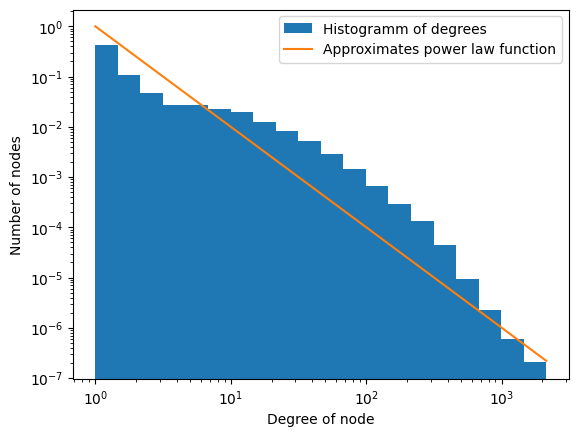

In [15]:
# Plot
# log_degree = pd.Series(np.log10(degree))
# hist, bins, _ = plt.hist(degree)
hist, bins = np.histogram(degree, bins=20)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(degree, bins=logbins, density=True, label="Histogramm of degrees")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree of node")
plt.ylabel("Number of nodes")
x = np.arange(1, np.max(degree),1)
y = x ** (-2)
plt.plot(x,y,label="Approximates power law function")
plt.legend()
plt.show()

In [36]:
def DFS(node, temp, visited):
    visited[node] = 1
    temp = np.append(temp, node)
    for i in graph[node]:
        if (visited.get(i) is None):
            temp, visited = DFS(i, temp, visited)
    return temp, visited

In [37]:
### Find connected components
sys.setrecursionlimit(len(graph))
nodes = list(graph)
visited = {}
cc = []
for i in tqdm(range(len(nodes)), desc="Searching for connected components"):
    if (visited.get(nodes[i]) is None):
        temp = np.array([])
        temp, visited = DFS(nodes[i], temp, visited)
        cc.append(temp)

Searching for connected components: 100%|██████████| 21557/21557 [00:00<00:00, 93691.80it/s]


In [38]:
length = []
for i in cc:
    length.append(len(i))

In [39]:
np.argmax(length)

0

In [68]:
cc_nodes = cc[np.argmax(length)]
    

In [69]:
len(cc_nodes)

21521

In [90]:
num_samples = 100
srcs = np.random.choice(np.arange(cc_num), num_samples, replace = False)
distances = np.array([])
for i in tqdm(range(num_samples)):
    src = srcs[i]
    distance = np.ones(cc_num) * np.inf
    distance[src] = 0
    queue = [src]
    while (len(queue) != 0):
        current_node = queue.pop(0)
        # Check the neighbors of the current node
        for neighbor in graph[cc_nodes[current_node]]:
            index = np.where(cc_nodes == neighbor)[0][0]
            # Update the distance if it's smaller than the current value
            if (distance[index] > distance[current_node] + 1):
                distance[index] = distance[current_node] + 1
                queue.append(index)
    distances = np.append(distances, distance)

100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


(array([6.63803461e-05, 1.14439717e-03, 1.24086772e-01, 0.00000000e+00,
        8.37856048e-01, 4.25954715e-01, 0.00000000e+00, 3.86904485e-02,
        7.62046373e-04, 1.06208554e-05]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

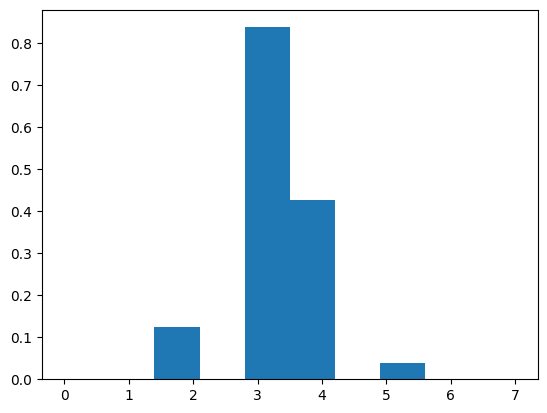

In [94]:
plt.hist(distances, density=True)

In [92]:
len(distances)

2152100

In [80]:
np.where(cc_nodes == neighbour)[0][0]

3848